## Data preparation using Numpy/Pandas by Changik Choi
#### Quick & Simple !

# Importing library
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Quick look
rides = pd.read_csv('train.csv')
rides.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


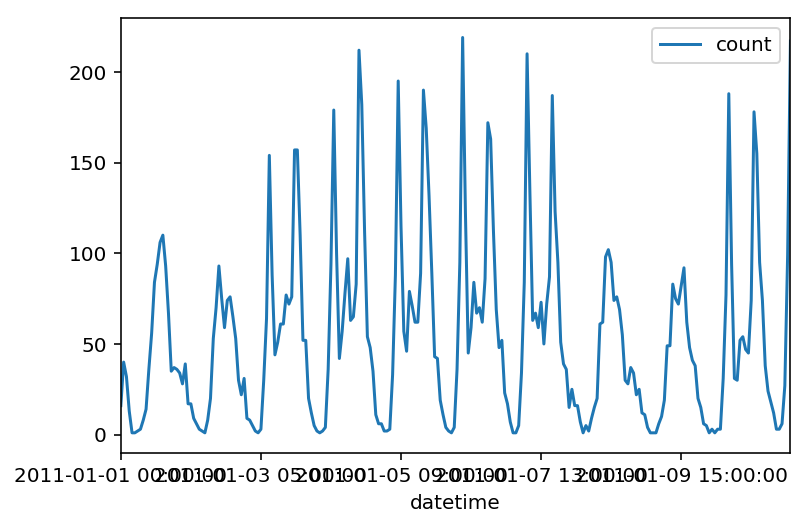

In [12]:
# First 10 days
rides[:24*10].plot(x='datetime', y='count')

In [13]:
# Apply "One Hot Encoding" on categorical variables
# You can use "pandas.get_dummies" library
dummy_fields = ['season', 'weather']
for field in dummy_fields:
    dummy = pd.get_dummies(rides[field], prefix=field, drop_first=False)
    rides = pd.concat([rides, dummy], axis=1)

In [14]:
# Drop off some fields we don't need
drop_fields = ['datetime', 'season', 'weather', 'registered', 'casual', 'atemp']
data = rides.drop(drop_fields, axis=1)
data.head()

,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0,16,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0,40,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0,32,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0,13,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,1,0,0,0,1,0,0,0


In [15]:
# Normalize the data.
# To get a higher accuracy, we need to normalized on its continous variable
# That is, each continous variable fields will have zero mean and standard deviation of 1
quant_features = ['count', 'temp', 'humidity', 'windspeed']
# We need to store scalings in a dictionary, we will need it later !
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [16]:
# Shuffle the data, and split into train and validation set
data.sample(frac=1).reset_index(drop=True)
[train, valid] = np.split(data, [int(.8*len(data))])
# Quick check how does data look like now
print ("Train: {}\t Valid: {}".format(train.shape, valid.shape))

Train: (8708, 14)	 Valid: (2178, 14)


In [17]:
# Let's seperate our inputs(features) and output(target)
train_inputs, train_outputs = train.drop('count', axis=1), train['count']
valid_inputs, valid_outputs = valid.drop('count', axis=1), valid['count']
# Quick check how does data look like now
print ("Train Inputs: {}\t Train Outputs: {}".format(train_inputs.shape, train_outputs.shape))

Train Inputs: (8708, 13)	 Train Outputs: (8708,)
